# Colour-Magnitude Diagrams

 Notes:

-HR Diagram is basically a colour-magnitude diagram.
-Luminosity (solar units) as a function of surface temperature (kelvin).
-Temperature axis: decreasing left to right (O,B,A,F,K,M).
-More massive a star is, more luminous it is.
-Lifetime is positively correlated with luminosity & temperature.

Various Branches in HR Diagram

-For temperature: Spectral Class (Colour(B-V))
-For luminosity: Absolute Magnitude (more to negative side, more luminous)

Color-Magnitude Diagram

-Equally same as the HR diagram. 
-Since luminosity & absolute temperature cannot be directly measured, color & magnitude is used instead.
-ie r vs g-r

Distance Modulus

Apparent magnitude (m) (brightness perceived from Earth) is measured when a star is observed. Absolute magnitude (M) is the apparent magnitude of a star if it was observed from 10 parsecs.

m-M = 5*log(d/(10*pc))

Isochrones

Curve representing a population of stars with same age. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

iso_data = 'C:/Users/egeki/Desktop/ATASAM/M42/isoch.dat'


#age,luminosity,temperature cols
loga,logl,logte = np.loadtxt(iso_data,usecols=(0,3,4), delimiter=r'\s+', unpack=True)

#delimiter='\t' indicates that data is tab-separated
#delimiter=r'\s+' indicates that data is separated by multiple white spaces

tolerance = 1e-5 #tolerance for floating-points

#np.where returns an array from an array given the condition
w7=np.where(np.abs(loga-7.0)<tolerance) #10e7 yrs
w8=np.where(np.abs(loga-8.0)<tolerance) #10e8 yrs
w9=np.where(np.abs(loga<9.0)<tolerance) #10e9 yrs

plt.plot(logte[w7],logl[w7], label='10e6 y')
plt.plot(logte[w8],logl[w8], label='10e8 y')
plt.plot(logte[w9],logl[w9], label='10e9 y')

plt.xlabel('Log(T_eff)')
plt.ylabel('Log(L)')
plt.show()

TypeError: Text reading control character must be a single unicode character or None; but got: '\\s+'

Text(0.5, 1.0, 'Isochrones for star cluster with age 10e8')

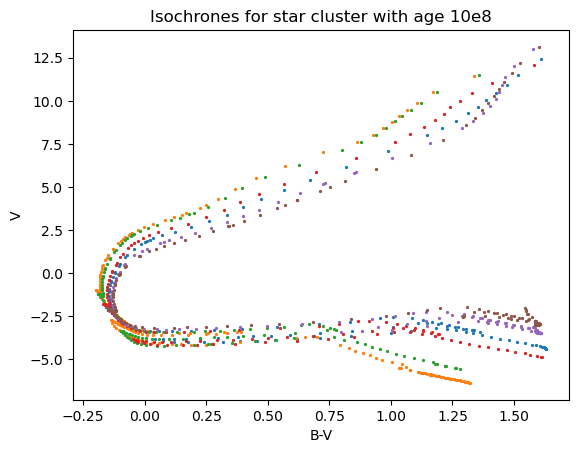

In [8]:
#Observational data (b,v magnitudes)

path_main = 'C:/Users/egeki/Desktop/ATASAM/M42/'

files = [
'isoc_z008.dat',
'isoc_z0001.dat',
'isoc_z0004.dat',
'isoc_z004.dat',
'isoc_z019.dat',
'isoc_z030.dat']

isoc_data = [os.path.join(path_main, file) for file in files]

#age,b,v data from several isochronic metallicity data
loga1, Mb1, Mv1 = np.loadtxt(isoc_data[0],usecols=(0,8,9),unpack=True)
loga2, Mb2, Mv2 = np.loadtxt(isoc_data[1],usecols=(0,8,9),unpack=True)
loga3, Mb3, Mv3 = np.loadtxt(isoc_data[2],usecols=(0,8,9),unpack=True)
loga4, Mb4, Mv4 = np.loadtxt(isoc_data[3],usecols=(0,8,9),unpack=True)
loga5 ,Mb5, Mv5 = np.loadtxt(isoc_data[4],usecols=(0,8,9),unpack=True)
loga6, Mb6, Mv6 = np.loadtxt(isoc_data[5],usecols=(0,8,9),unpack=True)

#preparing to plot for age 10e8
tolerance = 1e-5


w71 = np.where(abs(loga1-8.0)<tolerance)
w72 = np.where(abs(loga2-8.0)<tolerance)
w73 = np.where(abs(loga3-8.0)<tolerance)
w74 = np.where(abs(loga4-8.0)<tolerance)
w75 = np.where(abs(loga5-8.0)<tolerance)
w76 = np.where(abs(loga6-8.0)<tolerance)

plt.scatter(Mb1[w71]-Mv1[w71],Mv1[w71],label='z=.008',s=1.8)
plt.scatter(Mb2[w72]-Mv2[w72],Mv2[w72],label='z=.0001',s=1.8)
plt.scatter(Mb3[w73]-Mv3[w73],Mv3[w73],label='z=.0004',s=1.8)
plt.scatter(Mb4[w74]-Mv4[w74],Mv4[w74],label='z=.004',s=1.8)
plt.scatter(Mb5[w75]-Mv5[w75],Mv5[w75],label='z=.019',s=1.8)
plt.scatter(Mb6[w76]-Mv6[w76],Mv6[w76],label='z=.030',s=1.8)
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('Isochrones for star cluster with age 10e8')


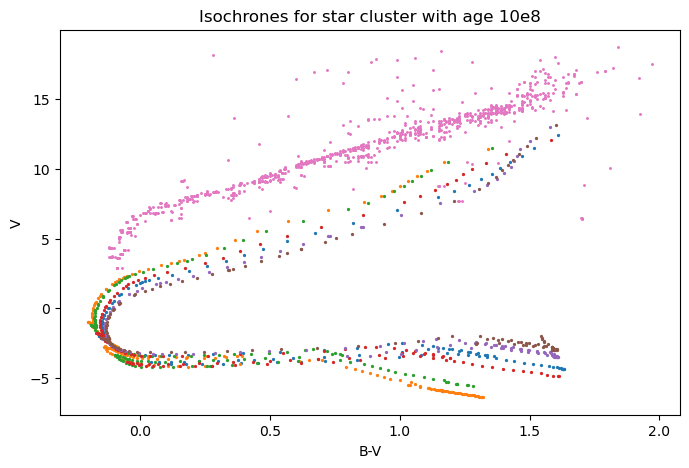

In [9]:
#Same cluster with M45 data

m45_data = os.path.join(path_main,'m45.dat')
m45v,m45bv = np.loadtxt(m45_data,usecols=(2,3),unpack=True)

plt.figure(figsize=[8,5])
plt.scatter(Mb1[w71]-Mv1[w71],Mv1[w71],label='z=.008',s=1.8)
plt.scatter(Mb2[w72]-Mv2[w72],Mv2[w72],label='z=.0001',s=1.8)
plt.scatter(Mb3[w73]-Mv3[w73],Mv3[w73],label='z=.0004',s=1.8)
plt.scatter(Mb4[w74]-Mv4[w74],Mv4[w74],label='z=.004',s=1.8)
plt.scatter(Mb5[w75]-Mv5[w75],Mv5[w75],label='z=.019',s=1.8)
plt.scatter(Mb6[w76]-Mv6[w76],Mv6[w76],label='z=.030',s=1.8)
plt.scatter(m45bv,m45v,s=1.2)
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('Isochrones for star cluster with age 10e8')
plt.show()

#notice M45 has the same curve as the cluster, but shifted up
#!!! absolute value of the shift (pink and others) will give 
#the distance between that cluster and M45 according to 
#distance modulus formula!!!

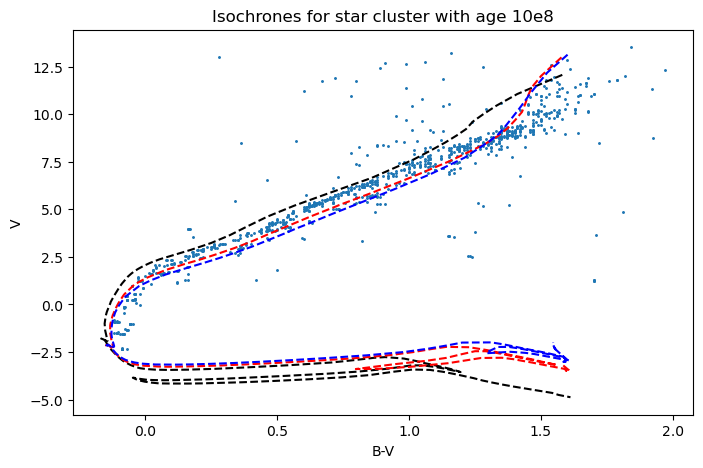

In [13]:
plt.figure(figsize=[8,5])

plt.plot(Mb4[w74]-Mv4[w74],Mv4[w74],'k--',label='z=.004')
plt.plot(Mb5[w75]-Mv5[w75],Mv5[w75],'r--',label='z=.019',)
plt.plot(Mb6[w76]-Mv6[w76],Mv6[w76],'b--',label='z=.030',)
plt.scatter(m45bv,m45v-5.2,s=1.2)
plt.xlabel('B-V')
plt.ylabel('V')
plt.title('Isochrones for star cluster with age 10e8')
plt.show()

#notice when y values of m45 are shifted scatter fits the curve
#metallicity should be around 0.03<=[Fe/H]<=0.04
#distance modulus = 5.2 (approx.)
#log[age] = 8.2 (approx.)